In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [4]:
dataset = pd.read_csv('/Users/albertopinheira/Library/Application Support/JetBrains/DataSpell2021.3/projects/WTCCC_Works/table_study_cases_control_with_new_controls.csv')

In [5]:
copy = dataset
copy['cohort'] = copy['cohort'].map({'case': 1 ,'control': 0})
dummy_dataset = copy.drop(columns=['patient', 'Age', 'Region', 'Gender'])
dummy_dataset = pd.get_dummies(dummy_dataset)

In [6]:
dummy_dataset_case = dummy_dataset[(dummy_dataset['cohort'] == 0)]
dummy_dataset_control = dummy_dataset[dummy_dataset['cohort'] == 1]

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,rs1006737_AA-2,rs1006737_AG-2,rs1006737_GG-2,rs4765914_CC-3,rs4765914_CT-3,rs4765914_TT-3,...,rs9371601_TT-4,rs1064395_AA-5,rs1064395_AG-5,rs1064395_GG-5,rs7680321_CC-6,rs7680321_CT-6,rs7680321_TT-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7
cohort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs1523041_CC-1,NaN,1.000000,-0.759582,-0.311191,0.008743,-0.016113,0.010356,-0.001162,0.006754,-0.013044,...,-0.003851,-0.010161,-0.001164,0.004590,-0.002298,0.011989,-0.011280,0.028273,-0.024522,-0.023831
rs1523041_CG-1,NaN,-0.759582,1.000000,-0.381742,-0.013396,0.003080,0.005518,0.004851,-0.017371,0.029056,...,-0.004117,-0.007281,-0.005556,0.007888,-0.009789,-0.024715,0.026442,-0.013362,0.007295,0.036262
rs1523041_GG-1,NaN,-0.311191,-0.381742,1.000000,0.007150,0.018397,-0.022780,-0.005437,0.015785,-0.023919,...,0.011487,0.025078,0.009772,-0.018047,0.017569,0.019075,-0.022607,-0.020653,0.024188,-0.019119
rs1006737_AA-2,NaN,0.008743,-0.013396,0.007150,1.000000,-0.306880,-0.335732,-0.336011,0.159280,0.437287,...,-0.004286,0.003339,0.009206,-0.010100,0.010753,0.020519,-0.022529,0.005769,-0.006566,0.004234
rs1006737_AG-2,NaN,-0.016113,0.003080,0.018397,-0.306880,1.000000,-0.793477,-0.370719,0.420975,-0.093063,...,0.000484,-0.035290,-0.006861,0.018687,0.017127,-0.010743,0.006799,-0.047915,0.053165,-0.027181
rs1006737_GG-2,NaN,0.010356,0.005518,-0.022780,-0.335732,-0.793477,1.000000,0.581769,-0.518497,-0.187520,...,0.002262,0.032792,0.000904,-0.012036,-0.023827,-0.002488,0.007677,0.043733,-0.048419,0.024194
rs4765914_CC-3,NaN,-0.001162,0.004851,-0.005437,-0.336011,-0.370719,0.581769,1.000000,-0.912130,-0.273306,...,0.003853,0.014319,0.007597,-0.012269,-0.017533,0.020011,-0.015819,0.002862,-0.004309,0.008225
rs4765914_CT-3,NaN,0.006754,-0.017371,0.015785,0.159280,0.420975,-0.518497,-0.912130,1.000000,-0.145003,...,-0.010135,-0.028104,-0.005049,0.014477,0.025123,-0.023610,0.017690,-0.018136,0.021603,-0.018899
rs4765914_TT-3,NaN,-0.013044,0.029056,-0.023919,0.437287,-0.093063,-0.187520,-0.273306,-0.145003,1.000000,...,0.014483,0.031389,-0.006490,-0.004358,-0.016635,0.007104,-0.003330,0.035653,-0.040294,0.024496


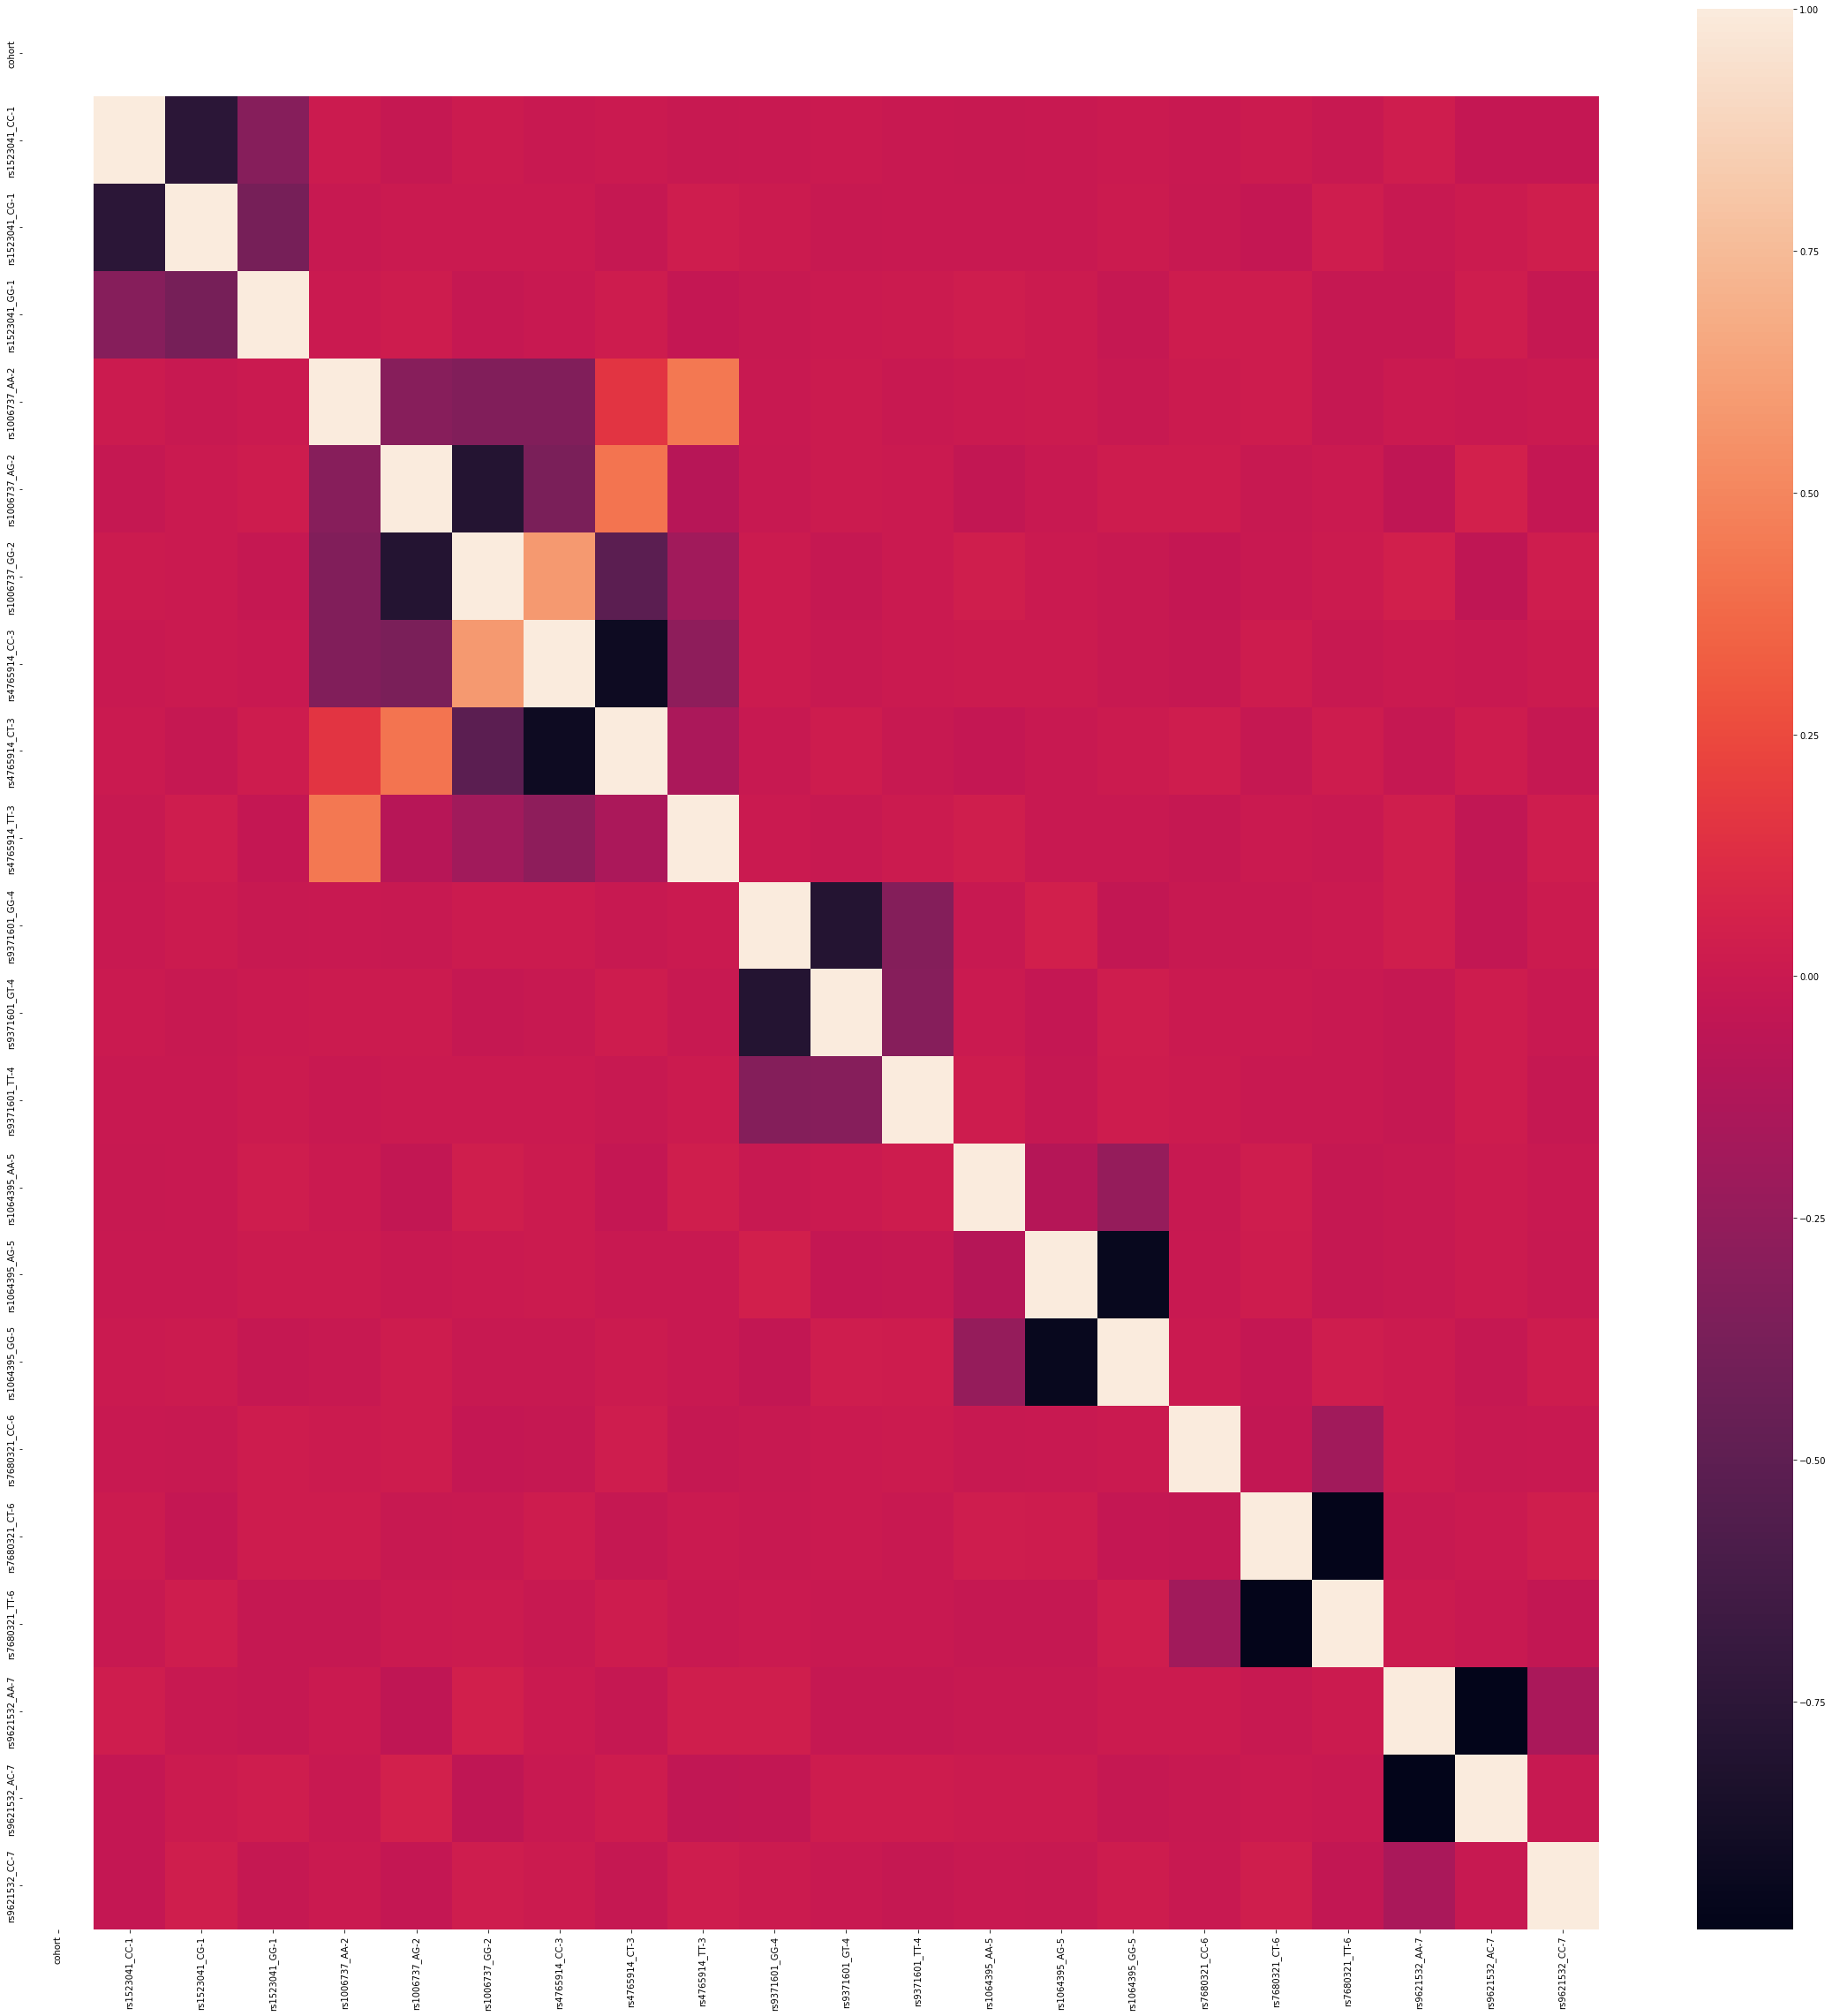

In [7]:
from matplotlib.colors import ListedColormap

corrMatrix_case_spearman = dummy_dataset_case.corr(method="spearman")
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_case_spearman)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_case_spearman)
plt.savefig('correlation_matrix_positives_case_spearman.png', facecolor='white', transparent=False)
plt.show()

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,rs1006737_AA-2,rs1006737_AG-2,rs1006737_GG-2,rs4765914_CC-3,rs4765914_CT-3,rs4765914_TT-3,...,rs9371601_TT-4,rs1064395_AA-5,rs1064395_AG-5,rs1064395_GG-5,rs7680321_CC-6,rs7680321_CT-6,rs7680321_TT-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7
cohort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs1523041_CC-1,NaN,1.000000,-0.738118,-0.340272,0.039785,-0.029585,0.003312,-0.000327,-0.020956,0.047825,...,0.004457,0.008385,0.054123,-0.055610,0.015412,-0.011581,0.006833,0.047179,-0.044035,-0.018915
rs1523041_CG-1,NaN,-0.738118,1.000000,-0.383251,-0.023112,0.024198,-0.009021,0.010905,0.006791,-0.040328,...,0.004268,-0.030237,-0.050506,0.060611,-0.033732,0.033953,-0.023331,-0.051362,0.054359,-0.010055
rs1523041_GG-1,NaN,-0.340272,-0.383251,1.000000,-0.022255,0.006777,0.008039,-0.014752,0.019225,-0.009266,...,-0.012050,0.030664,-0.003703,-0.008345,0.025914,-0.031467,0.023163,0.006997,-0.015478,0.039910
rs1006737_AA-2,NaN,0.039785,-0.023112,-0.022255,1.000000,-0.348822,-0.316360,-0.303963,0.114960,0.440646,...,-0.036822,-0.011099,0.007579,-0.003014,-0.029831,-0.025012,0.032931,-0.029370,0.034879,-0.023869
rs1006737_AG-2,NaN,-0.029585,0.024198,0.006777,-0.348822,1.000000,-0.778701,-0.373850,0.429369,-0.104905,...,0.054849,0.000271,-0.008807,0.008413,-0.008956,-0.010274,0.012577,0.003313,-0.001053,-0.011060
rs1006737_GG-2,NaN,0.003312,-0.009021,0.008039,-0.316360,-0.778701,1.000000,0.581903,-0.511575,-0.188801,...,-0.030869,0.007156,0.003840,-0.006498,0.029036,0.027144,-0.034776,0.016308,-0.022283,0.027173
rs4765914_CC-3,NaN,-0.000327,0.010905,-0.014752,-0.303963,-0.373850,0.581903,1.000000,-0.903457,-0.269833,...,-0.021100,0.019395,0.017764,-0.024726,0.041715,0.011051,-0.022765,-0.003239,-0.001011,0.020555
rs4765914_CT-3,NaN,-0.020956,0.006791,0.019225,0.114960,0.429369,-0.511575,-0.903457,1.000000,-0.168995,...,0.041586,-0.024371,-0.014416,0.023423,-0.031214,-0.005456,0.014296,0.003009,0.003473,-0.031196
rs4765914_TT-3,NaN,0.047825,-0.040328,-0.009266,0.440646,-0.104905,-0.188801,-0.269833,-0.168995,1.000000,...,-0.044899,0.010150,-0.008462,0.004236,-0.025797,-0.013153,0.020228,0.000687,-0.005478,0.022814


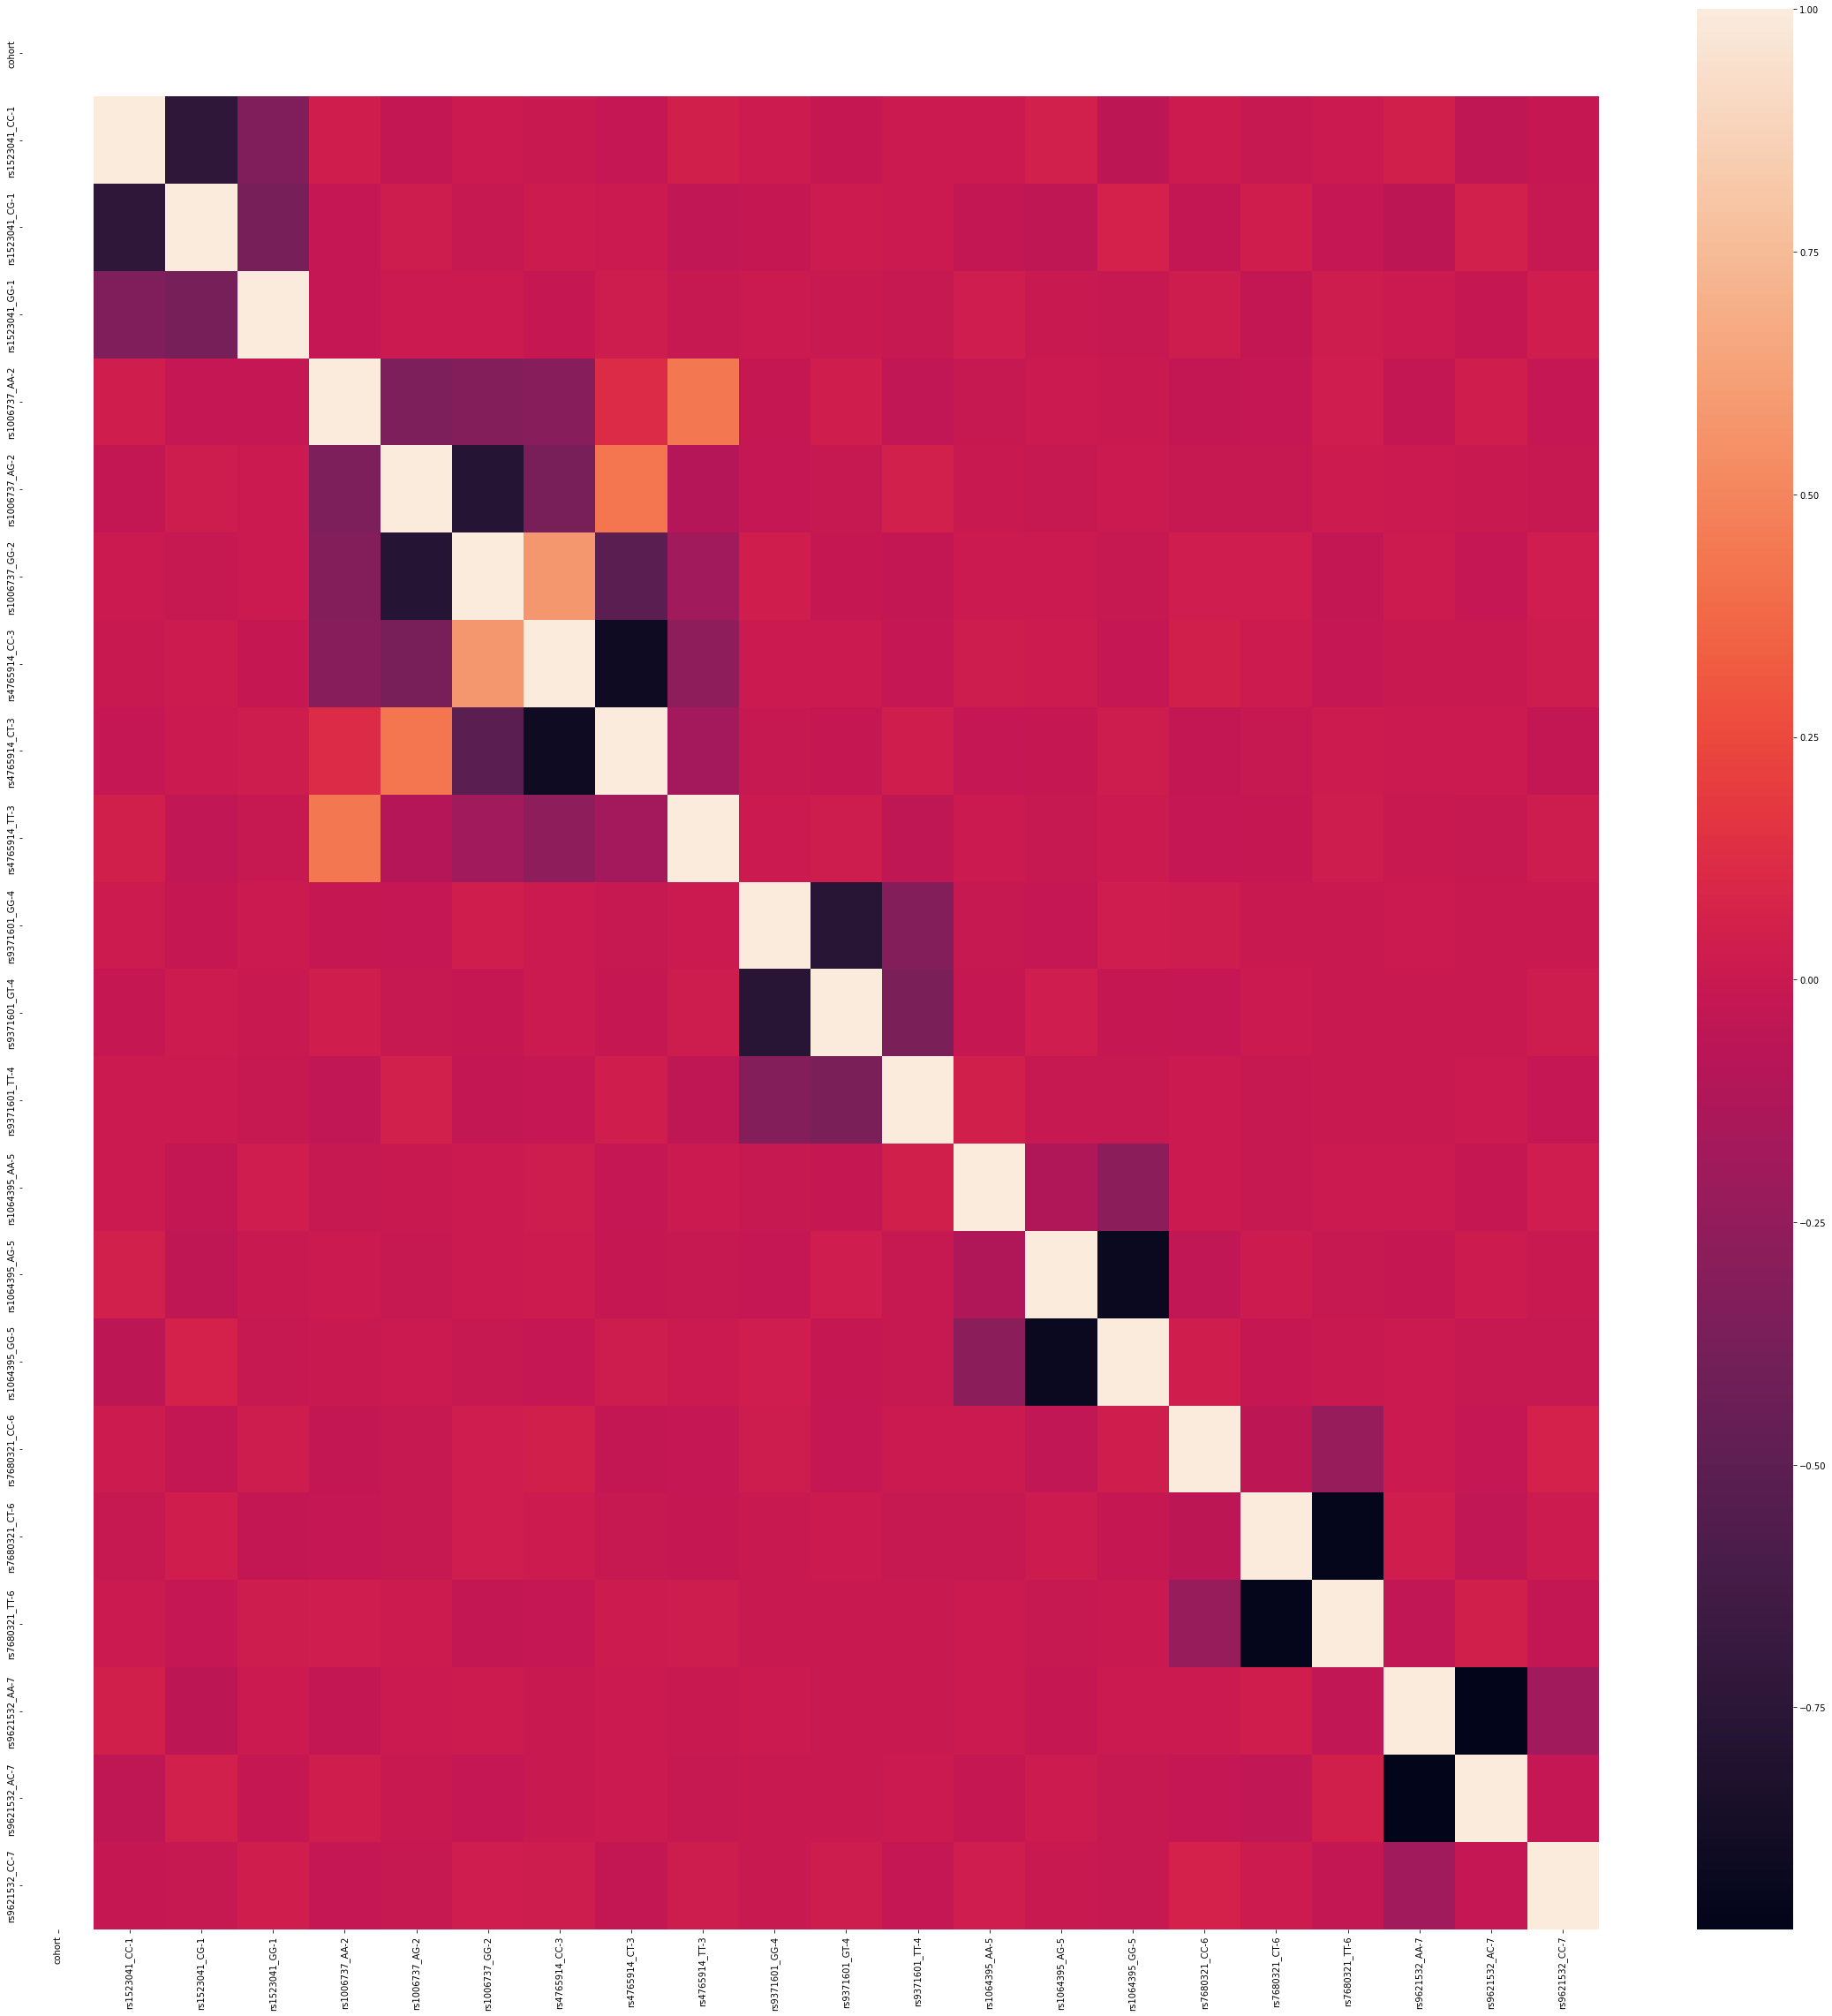

In [8]:
from matplotlib.colors import ListedColormap

corrMatrix_control_spearman = dummy_dataset_control.corr(method="spearman")
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_control_spearman)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_control_spearman)
plt.savefig('correlation_matrix_control_spearman.png', facecolor='white', transparent=False)
plt.show()

In [9]:
tuples_case_spearman = []
test_sad_case_spearman = []
cohort_case_tuples_spearman = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_case_spearman.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_case_spearman.append([(x,y) for x,y in zip(corrMatrix_case_spearman.iloc[0].index, corrMatrix_case_spearman.iloc[i])])

for a_tuple in tuples_case_spearman:
    for i in range(0, len(tuples_case_spearman)):
        cohort_case_tuples_spearman.append(a_tuple[i])

for a_tuple in cohort_case_tuples_spearman:
    test_sad_case_spearman.append(a_tuple[1])

print(test_sad_case_spearman)


tuples_control_spearman = []
test_sad_control_spearman = []
cohort_control_tuples_spearman = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_control_spearman.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_control_spearman.append([(x,y) for x,y in zip(corrMatrix_control_spearman.iloc[0].index, corrMatrix_control_spearman.iloc[i])])

for a_tuple in tuples_control_spearman:
    for i in range(0, len(tuples_control_spearman)):
        cohort_control_tuples_spearman.append(a_tuple[i])

for a_tuple in cohort_control_tuples_spearman:
    test_sad_control_spearman.append(a_tuple[1])

print(test_sad_control_spearman)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976931, -0.3111908019799922, 0.008742903038393689, -0.016112882383987188, 0.010356431737021351, -0.0011620267045973937, 0.006753611893685552, -0.013044006801911331, -0.004608918049135392, 0.007085355995913095, -0.003850552321595176, -0.010160659220187045, -0.0011636007896767585, 0.004589605614099207, -0.002297595940642798, 0.011988872566095961, -0.011279656653168438, 0.02827287086204953, -0.02452202527458288, -0.023830873916019495, nan, -0.7595823291976931, 1.0, -0.3817415621895152, -0.013396457011500343, 0.003079802059366238, 0.005518317210111141, 0.0048512190509885835, -0.017371427994593618, 0.029056120505845693, 0.013734912848499738, -0.011130396942594087, -0.004116722900166144, -0.007281055771214445, -0.005556292453800393, 0.007887655791103272, -0.009789448108593725, -0.02471470815233523, 0.026442189692613235, -0.013362491974792614, 0.007295359876340

In [10]:
tuples_v2_case_spearman = []
for col in corrMatrix_case_spearman.columns:
    for i in range(0, len(corrMatrix_case_spearman.iloc[0].index)):
        tuples_v2_case_spearman.append((corrMatrix_case_spearman.iloc[0].index[i],col ))

tuples_v2_control_spearman = []
for col in corrMatrix_control_spearman.columns:
    for i in range(0, len(corrMatrix_control_spearman.iloc[0].index)):
        tuples_v2_control_spearman.append((corrMatrix_control_spearman.iloc[0].index[i],col ))

In [11]:
df_case_spearman = pd.DataFrame(index=range(len(tuples_v2_case_spearman)), columns=['correlation'])

df_case_spearman.index = tuples_v2_case_spearman
df_case_spearman['correlation'] = test_sad_case_spearman


case_spearman_study = df_case_spearman.dropna()
case_spearman_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_GG-1, rs1523041_CC-1)",-0.311191
"(rs1006737_AA-2, rs1523041_CC-1)",0.008743
"(rs1006737_AG-2, rs1523041_CC-1)",-0.016113
...,...
"(rs7680321_CT-6, rs9621532_CC-7)",0.038222
"(rs7680321_TT-6, rs9621532_CC-7)",-0.036722
"(rs9621532_AA-7, rs9621532_CC-7)",-0.155049
"(rs9621532_AC-7, rs9621532_CC-7)",-0.014856


In [12]:
df_control_spearman = pd.DataFrame(index=range(len(tuples_v2_control_spearman)), columns=['correlation'])

df_control_spearman.index = tuples_v2_control_spearman
df_control_spearman['correlation'] = test_sad_control_spearman


control_spearman_study = df_control_spearman.dropna()
control_spearman_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.738118
"(rs1523041_GG-1, rs1523041_CC-1)",-0.340272
"(rs1006737_AA-2, rs1523041_CC-1)",0.039785
"(rs1006737_AG-2, rs1523041_CC-1)",-0.029585
...,...
"(rs7680321_CT-6, rs9621532_CC-7)",0.011804
"(rs7680321_TT-6, rs9621532_CC-7)",-0.029526
"(rs9621532_AA-7, rs9621532_CC-7)",-0.185009
"(rs9621532_AC-7, rs9621532_CC-7)",-0.021264


In [18]:
case_spearman_ordered = case_spearman_study[(case_spearman_study['correlation'] > 0.5) & (case_spearman_study['correlation'] < 1.0)]
case_spearman_ordered['correlation'].sort_values()

(rs4765914_CC-3, rs1006737_GG-2)    0.581769
(rs1006737_GG-2, rs4765914_CC-3)    0.581769
Name: correlation, dtype: float64

In [14]:
control_spearman_ordered =  control_spearman_study[(control_spearman_study['correlation'] > 0.5) & (control_spearman_study['correlation'] < 1.0)]
control_spearman_ordered['correlation'].sort_values()

(rs4765914_CC-3, rs1006737_GG-2)    0.581903
(rs1006737_GG-2, rs4765914_CC-3)    0.581903
Name: correlation, dtype: float64

In [19]:
case_neg_spearman_ordered = case_spearman_study[(case_spearman_study['correlation'] < -0.5) & (case_spearman_study['correlation'] > -1.0)]
case_neg_spearman_ordered['correlation'].sort_values()

(rs9621532_AC-7, rs9621532_AA-7)   -0.985495
(rs9621532_AA-7, rs9621532_AC-7)   -0.985495
(rs7680321_TT-6, rs7680321_CT-6)   -0.975623
(rs7680321_CT-6, rs7680321_TT-6)   -0.975623
(rs1064395_GG-5, rs1064395_AG-5)   -0.940934
(rs1064395_AG-5, rs1064395_GG-5)   -0.940934
(rs4765914_CT-3, rs4765914_CC-3)   -0.912130
(rs4765914_CC-3, rs4765914_CT-3)   -0.912130
(rs9371601_GT-4, rs9371601_GG-4)   -0.795436
(rs9371601_GG-4, rs9371601_GT-4)   -0.795436
(rs1006737_GG-2, rs1006737_AG-2)   -0.793477
(rs1006737_AG-2, rs1006737_GG-2)   -0.793477
(rs1523041_CG-1, rs1523041_CC-1)   -0.759582
(rs1523041_CC-1, rs1523041_CG-1)   -0.759582
(rs4765914_CT-3, rs1006737_GG-2)   -0.518497
(rs1006737_GG-2, rs4765914_CT-3)   -0.518497
Name: correlation, dtype: float64

In [20]:
control_neg_spearman_ordered = control_spearman_study[(control_spearman_study['correlation'] < -0.5) & (control_spearman_study['correlation'] > -1.0)]
control_neg_spearman_ordered['correlation'].sort_values()

(rs9621532_AC-7, rs9621532_AA-7)   -0.978581
(rs9621532_AA-7, rs9621532_AC-7)   -0.978581
(rs7680321_TT-6, rs7680321_CT-6)   -0.957782
(rs7680321_CT-6, rs7680321_TT-6)   -0.957782
(rs1064395_GG-5, rs1064395_AG-5)   -0.922343
(rs1064395_AG-5, rs1064395_GG-5)   -0.922343
(rs4765914_CT-3, rs4765914_CC-3)   -0.903457
(rs4765914_CC-3, rs4765914_CT-3)   -0.903457
(rs1006737_GG-2, rs1006737_AG-2)   -0.778701
(rs1006737_AG-2, rs1006737_GG-2)   -0.778701
(rs9371601_GT-4, rs9371601_GG-4)   -0.769756
(rs9371601_GG-4, rs9371601_GT-4)   -0.769756
(rs1523041_CG-1, rs1523041_CC-1)   -0.738118
(rs1523041_CC-1, rs1523041_CG-1)   -0.738118
(rs4765914_CT-3, rs1006737_GG-2)   -0.511575
(rs1006737_GG-2, rs4765914_CT-3)   -0.511575
Name: correlation, dtype: float64